
## Plants Seedling Classification


### Background 
Artificial Intelligence and IoT can offer technological innovations that can offer on one hand reduction for requirement for manual labor on the other hand it can provide suport services that can mitigate damage to the crops due to diseases, or monitor climate related changes to the harvest.  

Artificial Intelligence can offer reduction in time and energy required to identify plant seedlings. The ability to identify plant seedlings  more efficiently and even more effectively than experienced manual labor could lead to better crop yields, the freeing up of human involvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.

###  Objective

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has provided the data containing images of unique plants belonging to 12 different species. You being a data scientist, need to build a Convolutional Neural Network model which would classify the plant seedlings into their respective 12 categories.

### Data Description
This dataset contains images of unique plants belonging to 12 different species.

    The data file names are:
        images.npy
        Label.csv
    Due to the large volume of data, the images were converted to numpy arrays and stored in images.npy file and the corresponding labels are also put into Labels.csv so that you can work on the data/project seamlessly without having to worry about the high data volume.
    The goal of the project is to create a classifier capable of determining a plant's species from an image.

List of Plant species

    Black-grass
    Charlock
    Cleavers
    Common Chickweed
    Common Wheat
    Fat Hen
    Loose Silky-bent
    Maize
    Scentless Mayweed
    Shepherds Purse
    Small-flowered Cranesbill
    Sugar beet






## **Importing the necessary libraries**

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## **Reading the dataset**

In [ ]:
# Mount Google drive to access the dataset (monkeys_dataset.zip)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/images2.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/Labels2.csv')

## **Overview of the dataset**


Let's print the shape of the images and labels 

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

## Plotting images using OpenCV and matplotlib

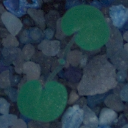

In [ ]:
cv2_imshow(images[5])

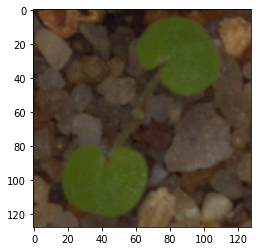

In [ ]:
plt.imshow(images[5])

- Like with the MLS project - here also one can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- I will convert these BGR images to RGB images so we could interpret them easily.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

In [ ]:
categories=np.unique(labels) 

In [ ]:
categories

array(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'], dtype=object)

In [ ]:
len(categories)

12

There are 12 categories of images of seeds: Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',       'Scentless Mayweed', 'Shepherds Purse',
       'Small-flowered Cranesbill', 'Sugar beet'

## **Exploratory Data Analysis** 

In [ ]:
def plot_images(images,labels):
  num_classes=12                                                                  # Number of Classes
  categories=np.unique(labels)   
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # number of rows=3
  cols = 4                                                                        #  number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      
          ax.set_title(keys[random_index])
  plt.show()

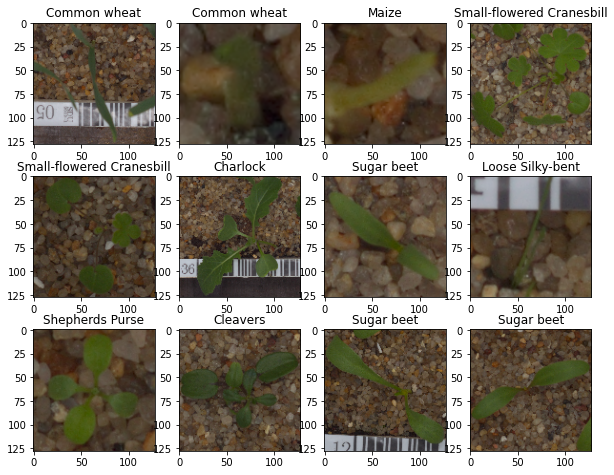

In [ ]:
plot_images(images,labels)

Some images are more blured, some have only brown bakcground some have a white and black stripe. 

<b> Checking for data imbalance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

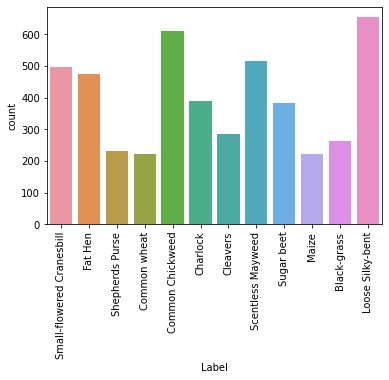

In [ ]:
 sns.countplot(labels['Label'])
 plt.xticks(rotation='vertical')

## Comment:
- As one can see from the plot the data set is not well balanced. 
- It would be balanced it each had 400 images. But the small flowered cranesbill, fat hen, common chickweed,scentless mayweed, loose silky bent have more images than 400 while the rest have less. 

### Resizing images 
As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)  
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

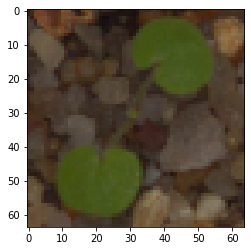

In [ ]:
plt.imshow(images_decreased[5])

## Trnasforming and visualizing images using Gaussian Blur 

In [ ]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))


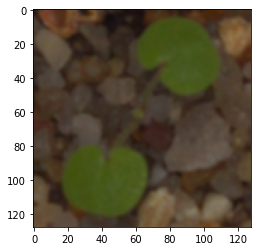

In [ ]:
plt.imshow(images_gb[5])

- It appears that GaussianBlur would be ineffective because the blurred image does not seem to contain any relevant information, and the model would struggle to categorize these blurred images.

I will first try images without Gaussian Blur

## **Splitting the dataset**

- As we have less images in our dataset, we will only use 10% of our data for testing and 90% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset while keeping the test size constant at 0.1. This means that 10% of total data is used for testing, while 90% is used for training. 


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.1, random_state=42,stratify=labels)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4275, 64, 64, 3) (4275, 1)
(475, 64, 64, 3) (475, 1)


## **Making the data compatible:**

- Convert labels from names to one hot vectors
- Normalizing the values


## Encoding the target labels

In [ ]:
# Convert labels from names to one hot vectors.
#

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_test_encoded=enc.transform(y_test)

## Data Normalization
Since the **image pixel values range from 0-255**, our method of normalization is **scaling** - i.e. **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0


## **Model Building - Convolutional Neural Network (CNN)**

I create a CNN model sequentially, where we will be adding the layers one after another.

(First, we need to clear the previous model's history from the session. )

MODEL 1 - Simple CNN 

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Now, let's build a **CNN Model** with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>


In [ ]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model.add(Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))

model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))


# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer 
model.add(Dense(12, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
# using Adam 
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 32)         0

Model has 120k parameters.

### <b> Fitting the model on the train data

In [ ]:
history_1 = model.fit(
            X_train_normalized, y_train_encoded,
            epochs=30,
            validation_split=0.1,
            # shuffle=True,
            batch_size=32,
            verbose=2
)

Epoch 1/30
121/121 - 2s - loss: 2.4587 - accuracy: 0.1336 - val_loss: 2.4321 - val_accuracy: 0.1238 - 2s/epoch - 17ms/step
Epoch 2/30
121/121 - 1s - loss: 2.4414 - accuracy: 0.1419 - val_loss: 2.4389 - val_accuracy: 0.1262 - 1s/epoch - 11ms/step
Epoch 3/30
121/121 - 1s - loss: 2.4328 - accuracy: 0.1393 - val_loss: 2.4078 - val_accuracy: 0.1238 - 1s/epoch - 11ms/step
Epoch 4/30
121/121 - 1s - loss: 2.4057 - accuracy: 0.1593 - val_loss: 2.3743 - val_accuracy: 0.3107 - 1s/epoch - 11ms/step
Epoch 5/30
121/121 - 1s - loss: 2.2906 - accuracy: 0.2467 - val_loss: 2.1861 - val_accuracy: 0.3458 - 1s/epoch - 11ms/step
Epoch 6/30
121/121 - 1s - loss: 2.1457 - accuracy: 0.2932 - val_loss: 2.0281 - val_accuracy: 0.3458 - 1s/epoch - 11ms/step
Epoch 7/30
121/121 - 1s - loss: 2.0815 - accuracy: 0.2909 - val_loss: 1.9678 - val_accuracy: 0.3645 - 1s/epoch - 11ms/step
Epoch 8/30
121/121 - 1s - loss: 2.0223 - accuracy: 0.3028 - val_loss: 1.8949 - val_accuracy: 0.3879 - 1s/epoch - 11ms/step
Epoch 9/30
121/1

### **Model Evaluation**

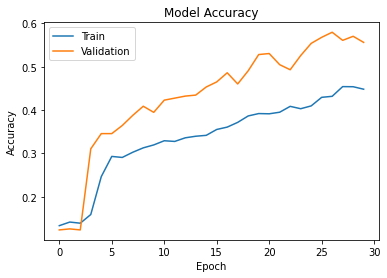

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

**Observations:** 


*   We can see from the above plot that **the training accuracy and the validation accuracy is not good.**






### **Evaluating the model on test data**

In [ ]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.3579 - accuracy: 0.5684 - 130ms/epoch - 9ms/step


### **Generating the predictions using test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

In [ ]:
y_pred

array([[3.1063974e-02, 3.5312355e-02, 4.9210779e-02, ..., 5.4738242e-02,
        2.8929798e-02, 8.0191545e-02],
       [2.9711360e-08, 7.8374349e-02, 3.5109419e-02, ..., 3.9674971e-02,
        8.3690077e-01, 1.1273990e-03],
       [5.4940989e-07, 9.0145813e-03, 5.3495266e-03, ..., 1.0520697e-02,
        9.2507380e-01, 1.4116524e-02],
       ...,
       [2.8332350e-01, 3.4447473e-10, 1.3875921e-06, ..., 1.6382661e-11,
        1.8209728e-10, 3.0996729e-05],
       [3.1063974e-02, 3.5312355e-02, 4.9210779e-02, ..., 5.4738242e-02,
        2.8929798e-02, 8.0191545e-02],
       [6.6075139e-05, 6.6813640e-02, 5.2614894e-02, ..., 7.3791243e-02,
        6.3702703e-01, 4.7213562e-02]], dtype=float32)

### **Plotting the Confusion Matrix**

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.





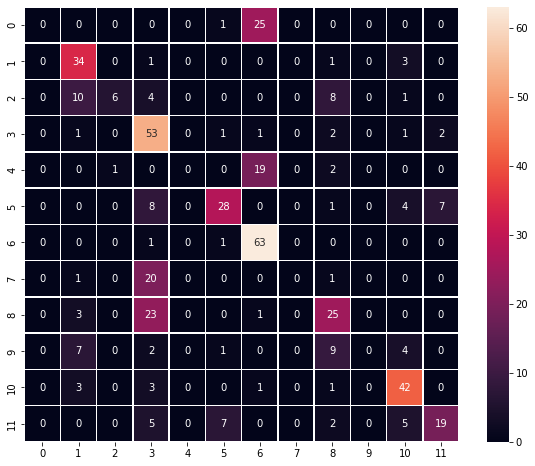

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- We observe that some of the classes are not predicted correctly. 
- Poor execution agrees with poor accuracy of the model.

# MODEL-2

I try another model - this time with data augmentation and Batch Normalization to check if we can improve the model's performance.

## **Data Augmentation**
**Possible operations on images to augment the dataset with a variety of artificially generated images:**

**1. Horizontal Flip** 
**2. Vertical Flip** 
**3. Height Shift** 
**4. Width Shift** 
**5. Rotation** 
**6. Shear** 
**7. Zoom** 

(Note **data augmentation should not be used in the validation/test data set**).

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# All images to be rescaled by 1/255.
train_datagen = ImageDataGenerator(
                              rotation_range=20, 
                              fill_mode='nearest'
                              )
# test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
# Intializing a sequential model
model = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2), padding = 'same'))
model.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model.add(Flatten())

# Adding a fully connected dense layer with 100 neurons    
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem  
model.add(Dense(12, activation='softmax'))

# Using SGD Optimizer
# opt = SGD(learning_rate=0.01, momentum=0.9)
opt=Adam()
# Compile model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                        

Parameters that will be obtaned in training process- 151 612

In [ ]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history = model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_test_normalized,y_test_encoded),
                    verbose=1)

Epoch 1/25
66/66 [==============================] - 6s 81ms/step - loss: 2.2210 - accuracy: 0.1981 - val_loss: 2.3808 - val_accuracy: 0.1789
Epoch 2/25
66/66 [==============================] - 5s 74ms/step - loss: 1.6852 - accuracy: 0.4016 - val_loss: 2.2984 - val_accuracy: 0.1621
Epoch 3/25
66/66 [==============================] - 5s 73ms/step - loss: 1.4988 - accuracy: 0.4614 - val_loss: 2.1449 - val_accuracy: 0.2842
Epoch 4/25
66/66 [==============================] - 9s 135ms/step - loss: 1.3513 - accuracy: 0.5205 - val_loss: 1.9098 - val_accuracy: 0.5242
Epoch 5/25
66/66 [==============================] - 5s 72ms/step - loss: 1.2870 - accuracy: 0.5467 - val_loss: 1.6531 - val_accuracy: 0.5516
Epoch 6/25
66/66 [==============================] - 5s 74ms/step - loss: 1.2164 - accuracy: 0.5583 - val_loss: 1.5172 - val_accuracy: 0.5916
Epoch 7/25
66/66 [==============================] - 5s 72ms/step - loss: 1.1751 - accuracy: 0.5885 - val_loss: 1.4135 - val_accuracy: 0.6147
Epoch 8/25
6

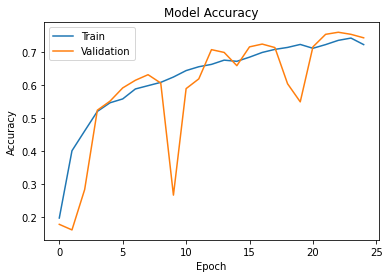

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 0.7880 - accuracy: 0.7432 - 71ms/epoch - 5ms/step


We can observe that our accuracy has improved compared to our previous model. Accuracy is 0.74 for both test and train set.

In [ ]:
# Here we would get the output as probablities for each category
y_pred=model.predict(X_test_normalized)

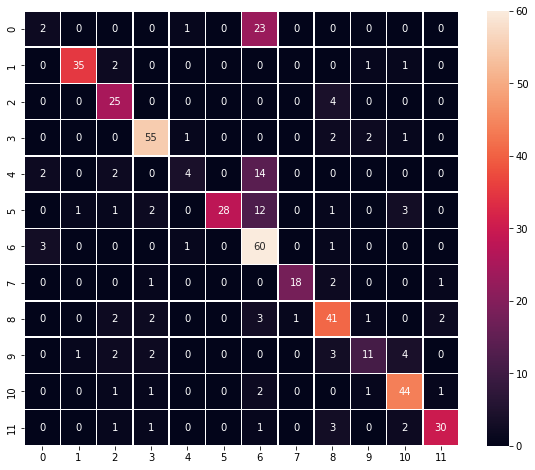

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observation:**
- The confusion matrix appears to be improving as well, however there is still some confusion with the 6th  of monkey species.

- It is the class that the most confused class among all.

- We can observe that this model has outperformed our previous model, even though it has smaller number of neurons/trainable parameters.

- I will now test a different version of data augmentation and data set w. Gaussin Blur as well as a different model architecture.

-Later I wil try transfer model with VGG16.

# MODEL-3 - Transfer Learning using VGG16

- First I load a pre-built neural architecture - **VGG16**, which was trained on the ImageNet dataset.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.


In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                65568     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 12)                204       
                                                                 
Total params: 14,780,988
Trainable params: 66,300
Non-

In [ ]:
# Epochs
epochs = 25
# Batch size
batch_size = 64

history_vgg16 = new_model.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_test_normalized,y_test_encoded),
                    verbose=1)

Epoch 1/25
66/66 [==============================] - 9s 111ms/step - loss: 2.3553 - accuracy: 0.1893 - val_loss: 2.1940 - val_accuracy: 0.2695
Epoch 2/25
66/66 [==============================] - 5s 81ms/step - loss: 2.1410 - accuracy: 0.2700 - val_loss: 2.0062 - val_accuracy: 0.3621
Epoch 3/25
66/66 [==============================] - 5s 79ms/step - loss: 1.9605 - accuracy: 0.3303 - val_loss: 1.8093 - val_accuracy: 0.4147
Epoch 4/25
66/66 [==============================] - 5s 82ms/step - loss: 1.8005 - accuracy: 0.3797 - val_loss: 1.6936 - val_accuracy: 0.4568
Epoch 5/25
66/66 [==============================] - 5s 80ms/step - loss: 1.6785 - accuracy: 0.4203 - val_loss: 1.6024 - val_accuracy: 0.4589
Epoch 6/25
66/66 [==============================] - 6s 84ms/step - loss: 1.5938 - accuracy: 0.4521 - val_loss: 1.5457 - val_accuracy: 0.4884
Epoch 7/25
66/66 [==============================] - 5s 80ms/step - loss: 1.5158 - accuracy: 0.4681 - val_loss: 1.4937 - val_accuracy: 0.4947
Epoch 8/25
6

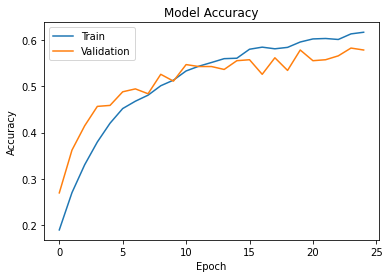

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - loss: 1.1593 - accuracy: 0.5789 - 338ms/epoch - 23ms/step


In [ ]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

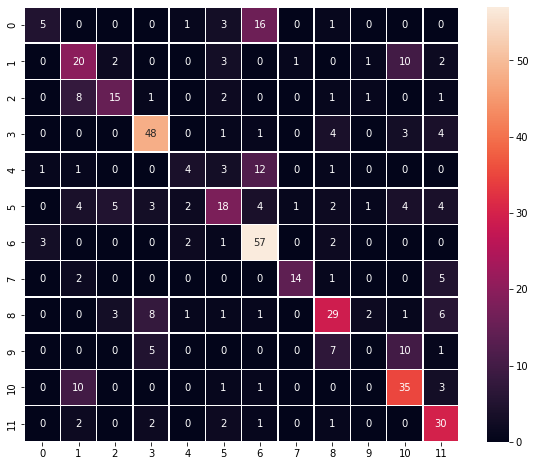

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

- According to the confusion matrix and accuracy curve, the VGG16 model does not outperform Model-2. This could be due to the data we're using;  there's a chance that these images aren't in the ImageNet dataset, whose weights have been used to build our CNN model.


## **Visualizing the prediction:**

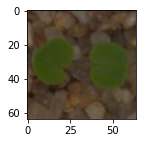

Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


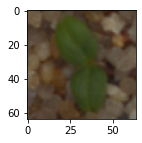

Predicted Label ['Cleavers']
True Label Cleavers


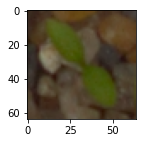

Predicted Label ['Common Chickweed']
True Label Common Chickweed


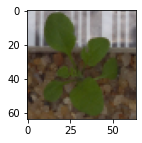

Predicted Label ['Small-flowered Cranesbill']
True Label Shepherds Purse


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[59],)
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[59].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[59])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Conclusion
- We can observe from the confusion matrix of all the models so far that our second model was the best model because it predicted the majority of the classes better than the other models.
- The test accuracy of the second model is 74%.
- Data Augmentation has also helped in improving the model. 
- Although VGGnet did not outperform Model-2, it is evident that simply employing the transfer learning model can produce a better outcome than any ordinary CNN.



## Discussion on Improvement
- Models above use original dataset with reduced size but augmented. 
- These models can be further improved by training with different filter sizes 
- These models can also be trained on the original image_size i.e 128 x 128 rather than being reduced to 64 (I try that below)
- Data Augmentation can be performed more and one can try different versions of this
- One can use 'masks' to filter out background as mostly the green colored parts of the image are relevant. 
- Other Transfer Learning architectures can also be used to train the CNN model and these models can be used for classification.(I use Xception by Google for transfer learning below)

## MODEL-4- Transfer learning using - XCEPTION - 'Extreme version of Inception' by Google 

Note- model did not work on decreased size images so I try on original size with Gaussian blur

In [ ]:
from tensorflow.keras.applications.xception import *


In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def xception():
    base_model = tf.keras.applications.Xception(weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False)
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    predictions = tf.keras.layers.Dense(12, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    # use Adam optimizer with model
    optimizer = tf.keras.optimizers.Adam(0.0005)
    # use categorical crossentropy loss since classification task
    model.compile(loss="categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
    return model  

In [ ]:
IMG_SIZE=128

In [ ]:
xception = xception()

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(np.array(images_gb),labels , test_size=0.1, random_state=42,stratify=labels)

In [ ]:
print(X_train2.shape,y_train2.shape)
print(X_test2.shape,y_test2.shape)

(4275, 128, 128, 3) (4275, 1)
(475, 128, 128, 3) (475, 1)


In [ ]:
y_train_encoded2 = enc.fit_transform(y_train2)
y_test_encoded2=enc.transform(y_test2)

In [ ]:
X_train_normalized2 = X_train2.astype('float32')/255.0
X_test_normalized2 = X_test2.astype('float32')/255.0

In [ ]:
batch_size = 16
epochs = 50

historyx = xception.fit(train_datagen.flow(X_train_normalized2,y_train_encoded2,
                                       batch_size=batch_size, 
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized2.shape[0] // batch_size,
                    validation_data=(X_test_normalized2,y_test_encoded2),
                    verbose=1)

Epoch 1/50
267/267 [==============================] - 35s 115ms/step - loss: 1.2360 - accuracy: 0.6062 - val_loss: 0.6775 - val_accuracy: 0.7642
Epoch 2/50
267/267 [==============================] - 29s 107ms/step - loss: 0.4602 - accuracy: 0.8422 - val_loss: 0.8008 - val_accuracy: 0.7916
Epoch 3/50
267/267 [==============================] - 30s 112ms/step - loss: 0.2956 - accuracy: 0.8941 - val_loss: 0.9717 - val_accuracy: 0.8147
Epoch 4/50
267/267 [==============================] - 29s 107ms/step - loss: 0.2784 - accuracy: 0.9026 - val_loss: 0.5068 - val_accuracy: 0.8842
Epoch 5/50
267/267 [==============================] - 29s 107ms/step - loss: 0.2221 - accuracy: 0.9307 - val_loss: 0.3208 - val_accuracy: 0.9158
Epoch 6/50
267/267 [==============================] - 29s 107ms/step - loss: 0.1730 - accuracy: 0.9411 - val_loss: 0.3037 - val_accuracy: 0.9284
Epoch 7/50
267/267 [==============================] - 29s 107ms/step - loss: 0.1708 - accuracy: 0.9444 - val_loss: 0.3607 - val_ac

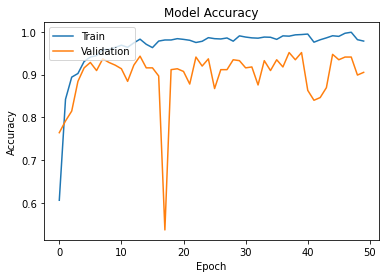

In [ ]:
plt.plot(historyx.history['accuracy'])
plt.plot(historyx.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
accuracy = xception.evaluate(X_test_normalized2, y_test_encoded2, verbose=2)

15/15 - 1s - loss: 0.5639 - accuracy: 0.9053 - 790ms/epoch - 53ms/step


In [ ]:
# Here we would get the output as probablities for each category
y_pred2=xception.predict(X_test_normalized2)

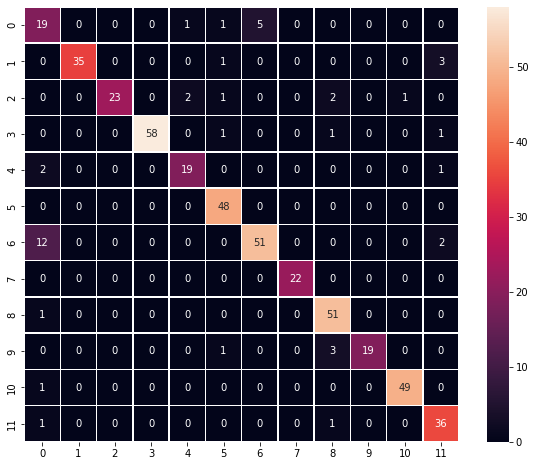

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg2=np.argmax(y_pred2,axis=1)
y_test_arg2=np.argmax(y_test_encoded2,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg2,y_pred_arg2)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

We can see that 0th category is somewhat misclassified. The rest looks good.

## Conclusions - best model so far

Model = "Xception tranfer learning" for using original size image and Gaussina Blur flter achieve >90% on train, test and validation data. Without augmenting dataset. 

There is some instability but overallit performs very well.

## MODEL-5 Same as MODEL-4 but with dataset with  different augmentation method (using dataset with original size and applied Gaussian Blur - same as in MODEL4) 

In [ ]:
datagen = ImageDataGenerator(
        rotation_range=180,  
        zoom_range = 0.1,
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=True  
    )  
datagen.fit(X_train2)

In [ ]:
historyx2 = xception.fit_generator(datagen.flow(X_train2, y_train_encoded2, batch_size=8), 
                    epochs=15, validation_data=(X_test2, y_test_encoded2))

Epoch 1/15
535/535 [==============================] - 37s 69ms/step - loss: 0.1387 - accuracy: 0.9567 - val_loss: 0.3506 - val_accuracy: 0.9389
Epoch 2/15
535/535 [==============================] - 35s 65ms/step - loss: 0.1402 - accuracy: 0.9546 - val_loss: 0.4628 - val_accuracy: 0.9432
Epoch 3/15
535/535 [==============================] - 35s 65ms/step - loss: 0.1296 - accuracy: 0.9591 - val_loss: 0.4282 - val_accuracy: 0.9326
Epoch 4/15
535/535 [==============================] - 35s 65ms/step - loss: 0.1318 - accuracy: 0.9591 - val_loss: 0.9600 - val_accuracy: 0.9179
Epoch 5/15
535/535 [==============================] - 35s 65ms/step - loss: 0.1323 - accuracy: 0.9579 - val_loss: 0.4554 - val_accuracy: 0.9411
Epoch 6/15
535/535 [==============================] - 35s 65ms/step - loss: 0.1446 - accuracy: 0.9535 - val_loss: 0.1877 - val_accuracy: 0.9516
Epoch 7/15
535/535 [==============================] - 35s 66ms/step - loss: 0.0904 - accuracy: 0.9691 - val_loss: 0.2004 - val_accuracy:

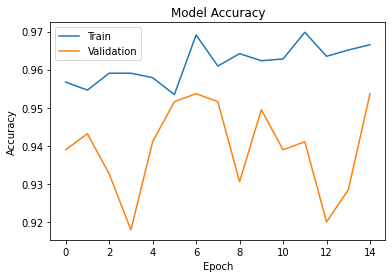

In [ ]:
plt.plot(historyx2.history['accuracy'])
plt.plot(historyx2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Conclusion - MODEL5 (=MODEL4 trained on augmented dataset) can perform even better i.e.  > 95% accuracy. 